# **Part 2: Task 4.9**

## **Content**
> #### 01. Importing Libraries
> #### 02. Importing Data
> #### 03. Exploring New Dataset
> #### 04. Exercise Charts
>> ##### 04.1. Bar Chart
>> ##### 04.2. Histogram
>> ##### 04.3. Scatterplot
>> ##### 04.4. Line Chart
>>> ###### 04.4.1. Creating Sample Dataframe
>>> ###### 04.4.2. Creating Line Chart
> #### 05. Histogram - sales per hour of day
> #### 06. Bar Chart - Orders based on loyalty
> #### 07. Line Chart - Expenditure per hour of day
> #### 08. Line Chart - Age vs. Number of Dependents
> #### 09. Scatterplot - Age vs. Spending Power (Income)
> #### 10. Exporting Charts

## 01. Importing Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 02. Importing Data

In [2]:
# Creating a path to main project folder
path = r'C:\Users\jboer\OneDrive\Documents\Career Foundry\Instacart Basket Analysis'

In [4]:
# Importing "customers" data
df_all = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_all.pkl'))

## 03. Exploring Data

In [32]:
# Reviewing dataframe
df_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
1,2539329,1,1,2,8,0.0,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
2,2539329,1,1,2,8,0.0,12427,3,0,Original Beef Jerky,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
3,2539329,1,1,2,8,0.0,26088,4,0,Aged White Cheddar Popcorn,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
4,2539329,1,1,2,8,0.0,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both


In [33]:
# Checking shape
df_all.shape

(32404859, 33)

In [34]:
# Reviewing columns
df_all.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_label', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'avg_spent',
       'spending_flag', 'median_order_frequency', 'order_frequency_flag',
       'first_name', 'last_name', 'gender', 'state', 'age', 'date_joined',
       'n_dependants', 'fam_status', 'income', '_merge'],
      dtype='object')

## 04. Exercise Charts

##### **Note**: Charts were already created in another notebook, but I copied the code here to show my work.

### 04.1. Bar Chart

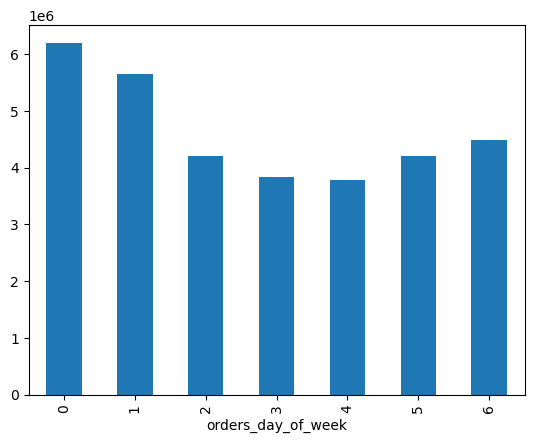

In [13]:
# Creating a bar chart for "orders_day_of_week" column by index order
bar = df_all['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [14]:
# Exporting bar chart and saving it as an image in projects folder
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

### 04.2. Histogram

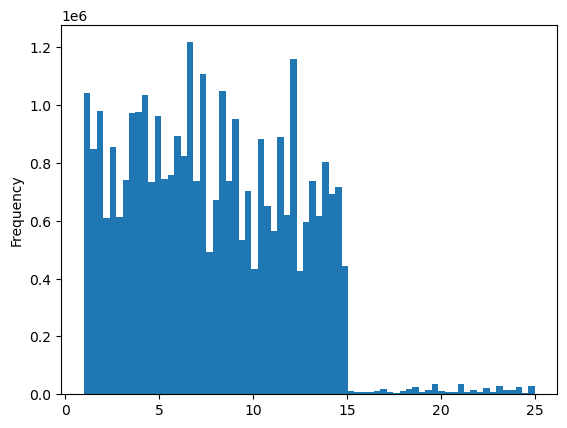

In [16]:
# Creating a histogram for "prices" column
hist = df_all['prices'].plot.hist(bins = 70)

##### Image was already exported in exercise notebook.

### 04.3. Scatterplot

<Axes: xlabel='prices', ylabel='prices'>

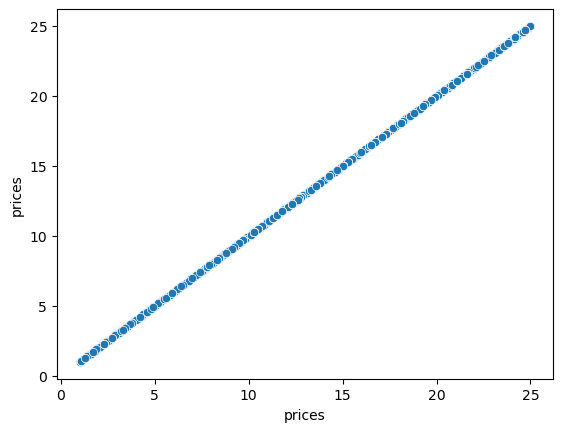

In [17]:
# Creating a scatterplot of "prices" column
sns.scatterplot(x = 'prices', y = 'prices',data = df_all)

##### Image was already exported in exercise notebook.

### 04.4. Line Chart

#### 04.4.1. Creating Sample Dataframe

In [55]:
# Creating a list holding True/False values to the test np.random.rand() <= 0.7
np.random.seed(4)
dev = np.random.rand(len(df_all)) <= 0.7

In [64]:
# Checking list "dev"
dev

array([False,  True, False, ...,  True,  True,  True])

In [57]:
# Store 70% of the sample in the dataframe "big"
big = df_all[dev]

In [58]:
# Store 30% of the sample the dataframe "small"
small = df_all[~dev]

In [23]:
# Checking length of original dataframe
len(df_all)

32404859

In [24]:
# Checking that length of sample dataframes match original
len(big) + len(small)

32404859

In [25]:
# Reducing "small" sample dataframe to only columns needed for chart.
df_sample = small[['orders_day_of_week', 'prices']]

In [26]:
# Checking reduced "small" dataframe
df_sample.head()

,orders_day_of_week,prices
0,2,9.0
2,2,4.4
3,2,4.7
6,3,3.0
10,3,4.0


#### 04.4.2. Creating Line Chart

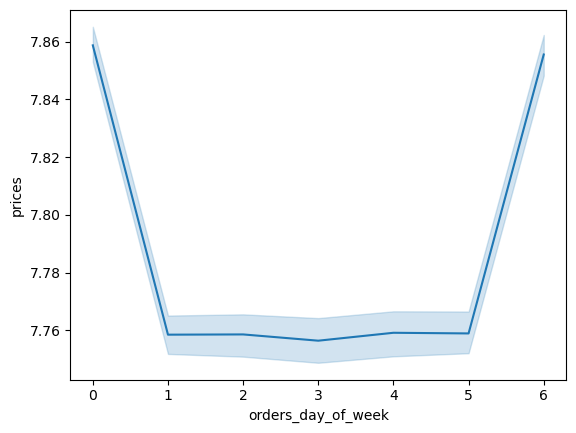

In [27]:
# Creating a line chart from the "df_sample" dataframe created above
line = sns.lineplot(data = df_sample, x = 'orders_day_of_week', y = 'prices')

##### Image was already exported in exercise notebook.

## 05. Histogram - sales per hour of day

Text(0.5, 1.0, 'Frequency of Orders per Hour of Day')

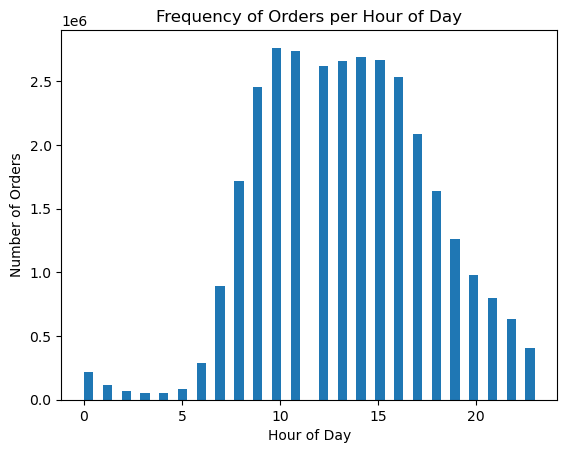

In [84]:
# Creating a histogram for "order_hour_of_day" column
hist_hour = df_all['order_hour_of_day'].plot.hist(bins = 48)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.title('Frequency of Orders per Hour of Day')

##### The histogram above shows the frequency of orders (y-axis) for each hour in a day (x-axis). Looking at the chart we can see that the most orders occur between 10AM and 3PM. And the fewest orders are placed between 12AM and 5AM.

## 06. Bar Chart - Orders based on loyalty

In [42]:
# Aggregating data by "loyalty_flag" and calculating average of price spent
avg_prices = df_all.groupby('loyalty_flag')['prices'].mean()

Text(0.5, 1.0, 'Average Spent Among Customers by Loyalty')

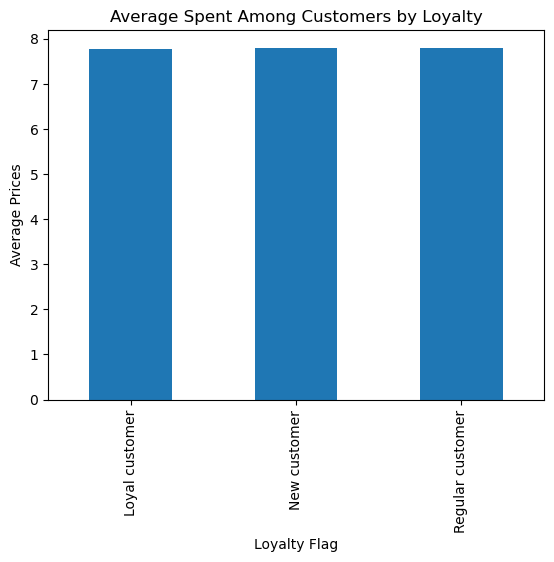

In [43]:
# Creating bar chart for average price spent based on loyalty
bar_loyal_avg = avg_prices.sort_index().plot.bar()
plt.xlabel('Loyalty Flag')
plt.ylabel('Average Prices')
plt.title('Average Spent Among Customers by Loyalty')

In [40]:
# Aggregating data by "loyalty_flag" and calculating sum of price spent
sum_prices = df_all.groupby('loyalty_flag')['prices'].sum()

Text(0.5, 1.0, 'Total Spent Among Customers by Loyalty')

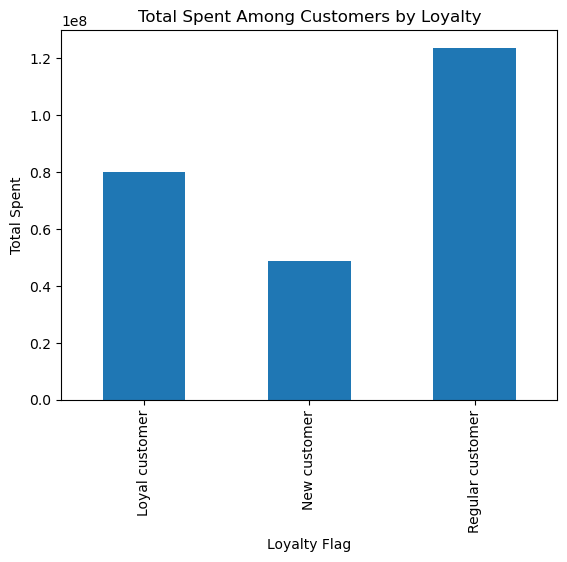

In [44]:
# Creating bar chart for sum of price based on loyalty
bar_loyal_sum = sum_prices.sort_index().plot.bar()
plt.xlabel('Loyalty Flag')
plt.ylabel('Total Spent')
plt.title('Total Spent Among Customers by Loyalty')

## 07. Line Chart - Expenditure per hour of day

In [65]:
# Creating a list holding True/False values to the test np.random.rand() <= 0.7
np.random.seed(6)
dev_1 = np.random.rand(len(df_all)) <= 0.7

In [66]:
# Checking list "dev"
dev_1

array([False,  True, False, ...,  True,  True,  True])

In [68]:
# Store 70% of the sample in the dataframe "big_1"
big_1 = df_all[dev_1]

In [69]:
# Store 30% of the sample the dataframe "small_1"
small_1 = df_all[~dev_1]

In [70]:
# Checking that length of sample dataframes match original
len(big_1) + len(small_1)

32404859

In [74]:
# Using "small_1" sample dataframe and reducing columns to "prices" and "order_hour_of_day"
line_sample = small_1[['order_hour_of_day', 'prices']]

In [72]:
# Checking reduced dataframe "line_sample"
line_sample.head()

,order_hour_of_day,prices
0,8,9.0
2,8,4.4
11,12,9.0
15,12,3.2
16,7,9.0


Text(0.5, 1.0, 'Expenditure per Hour of Day (30% Random Sample)')

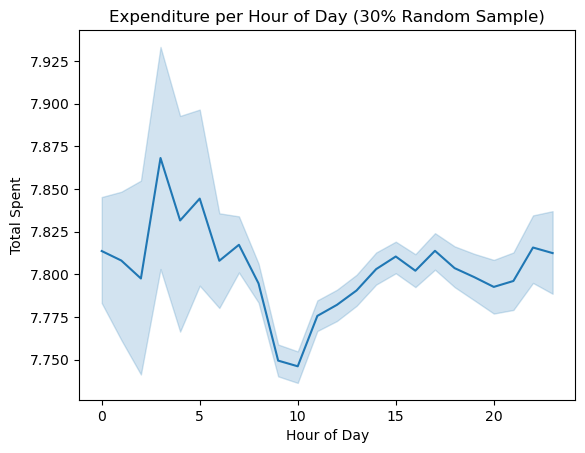

In [73]:
# Creating line chart to see expenditure per hour of day
line_hour = sns.lineplot(data = line_sample, x = 'order_hour_of_day', y = 'prices')
plt.xlabel('Hour of Day')
plt.ylabel('Total Spent')
plt.title('Expenditure per Hour of Day (30% Random Sample)')

## 08. Line Chart - Age vs. Number of Dependents

In [51]:
# Realized column name "n_dependants" is spelled wrong, correcting the spelling mistake by renaming column
df_all.rename(columns = {'n_dependants' : 'n_dependents'}, inplace = True)

In [52]:
# Checking renamed column
df_all.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_label', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'avg_spent',
       'spending_flag', 'median_order_frequency', 'order_frequency_flag',
       'first_name', 'last_name', 'gender', 'state', 'age', 'date_joined',
       'n_dependents', 'fam_status', 'income', '_merge'],
      dtype='object')

In [75]:
# Using "small_1" sample dataframe from before but reducing columns to "age" and "n_dependents"
line_sample_1 = small_1[['age', 'n_dependents']]

In [76]:
# Checking reduced dataframe "line_sample"
line_sample_1.head()

,age,n_dependents
0,31,3
2,31,3
11,31,3
15,31,3
16,31,3


Text(0.5, 1.0, 'Age vs. Number of Dependents')

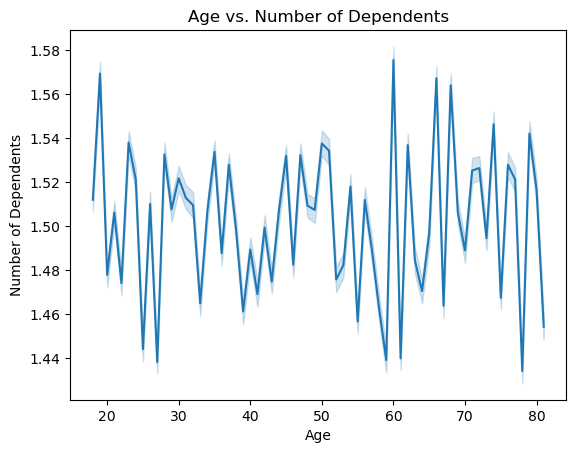

In [77]:
# Creating line chart to see connections between age and number of dependents
line_age_dep = sns.lineplot(data = line_sample_1, x = 'age', y = 'n_dependents')
plt.xlabel('Age')
plt.ylabel('Number of Dependents')
plt.title('Age vs. Number of Dependents')

##### The line chart above shows a varying number of dependents across age groups. There doesn't seem to be any discernible correlation between age and number of dependents. 

## 09. Scatterplot - Age vs. Spending Power (Income)

Text(0.5, 1.0, 'Age vs. Spending Power (Income)')

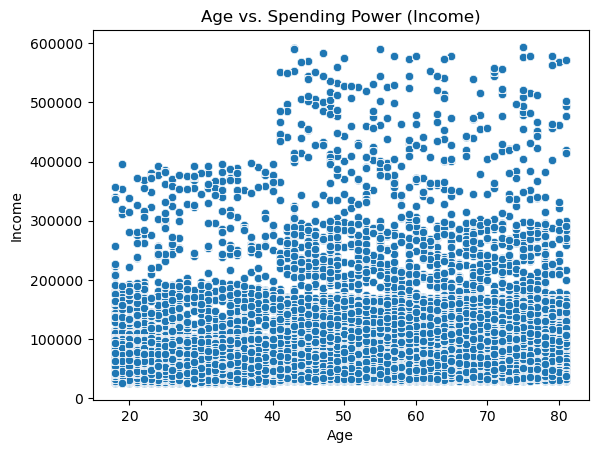

In [81]:
# Creating a scatterplot of "age" and "income" columns
scatter = sns.scatterplot(x = 'age', y = 'income', data = df_all)
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Age vs. Spending Power (Income)')

##### The scatterplot above shows a very heavy concentration of customers that have an income less than 200,000 dolars. We can also see that there are no customers from the ages of 18-40 that have an income greater than 400,000 dollars. Only the age groups 40 and above have incomes greater than 400,000 dollars. There is also a heavier concentration of customers with incomes in the 200,000-300,000 dollar range from ages 40 and up.  

## 10. Exporting Charts

In [85]:
# Exporting sales per hour of day histogram and saving it as an image in projects folder
hist_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_sales_hour.png'))

In [86]:
# Exporting average orders by loyalty bar chart and saving it as an image in projects folder
bar_loyal_avg.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyal_avg.png'))

In [87]:
# Exporting total orders by loyalty bar chart and saving it as an image in projects folder
bar_loyal_sum.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyal_sum.png'))

In [88]:
# Exporting saels per hour of day line chart and saving it as an image in projects folder
line_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_sales_hour.png'))

In [89]:
# Exporting age vs. dependents line chart and saving it as an image in projects folder
line_age_dep.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dep.png'))

In [90]:
# Exporting age vs. income scatterplot and saving it as an image in projects folder
scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income.png'))

## 11. Exporting Dataset

In [93]:
# Exporting final dataframe
df_all.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))